# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [68]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [55]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [191]:
# Filtrar o DataFrame para incluir apenas as linhas com a categoria 'Office Supplies'
df_p1 = df_dsa.loc[df_dsa['Categoria'] == 'Office Supplies']

# Agrupar as vendas por cidade e calcular a soma das vendas para cada cidade
vendas_por_cidade = df_p1.groupby('Cidade')['Valor_Venda'].sum()

# Encontrar a cidade com o valor máximo de vendas
cidade_com_max_vendas = vendas_por_cidade.idxmax()

print(f"A cidade com maior valor de venda de produtos 'Offfice Supplies' foi {vendas_por_cidade.idxmax()}")

A cidade com maior valor de venda de produtos 'Offfice Supplies' foi New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

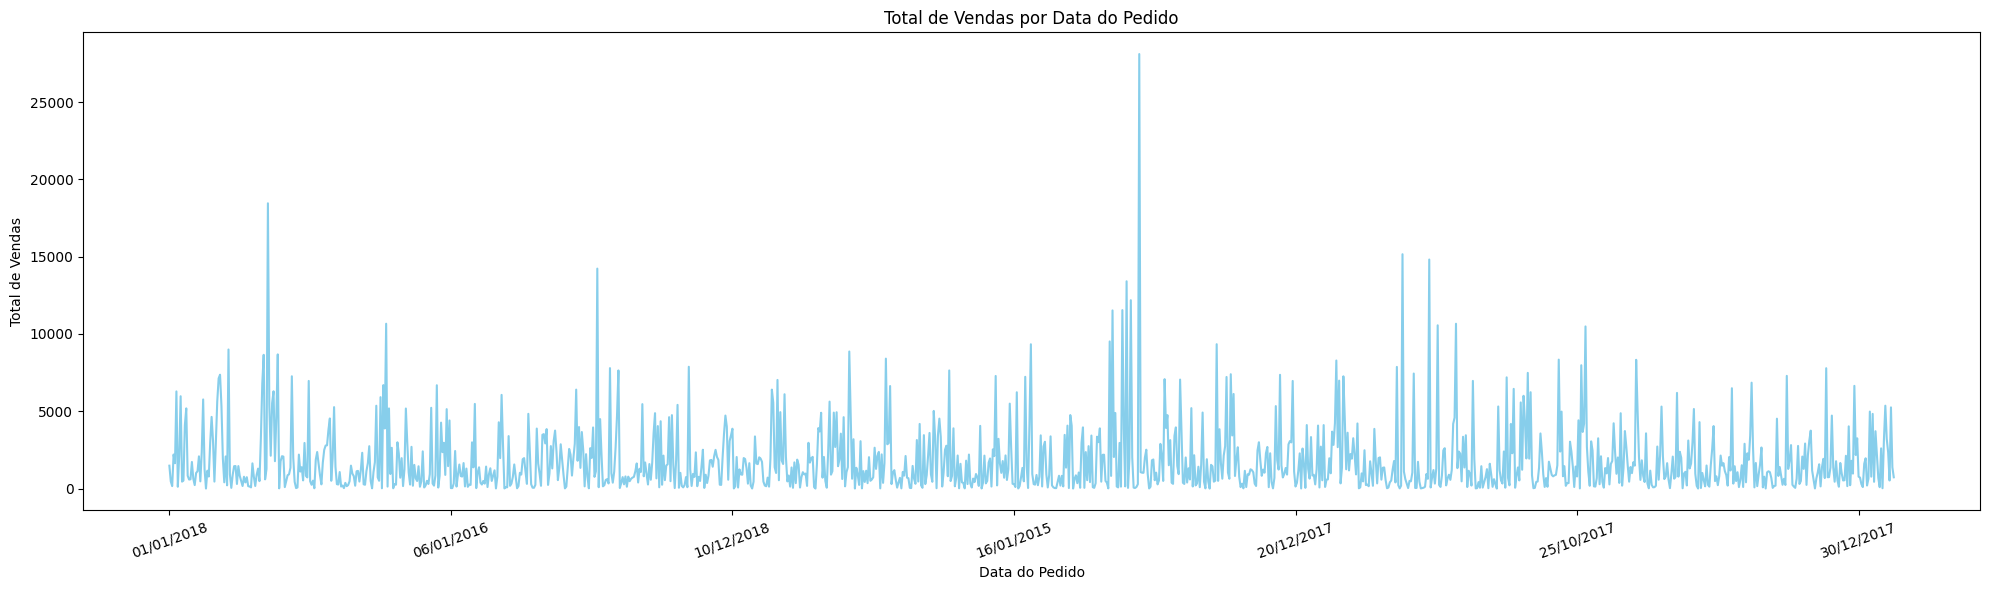

In [14]:
df_p2 = df_dsa.groupby('Data_Pedido')['Valor_Venda'].sum()

# Criar o gráfico de barras
plt.figure(figsize=(20, 6))
df_p2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color='skyblue')
plt.title('Total de Vendas por Data do Pedido')
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

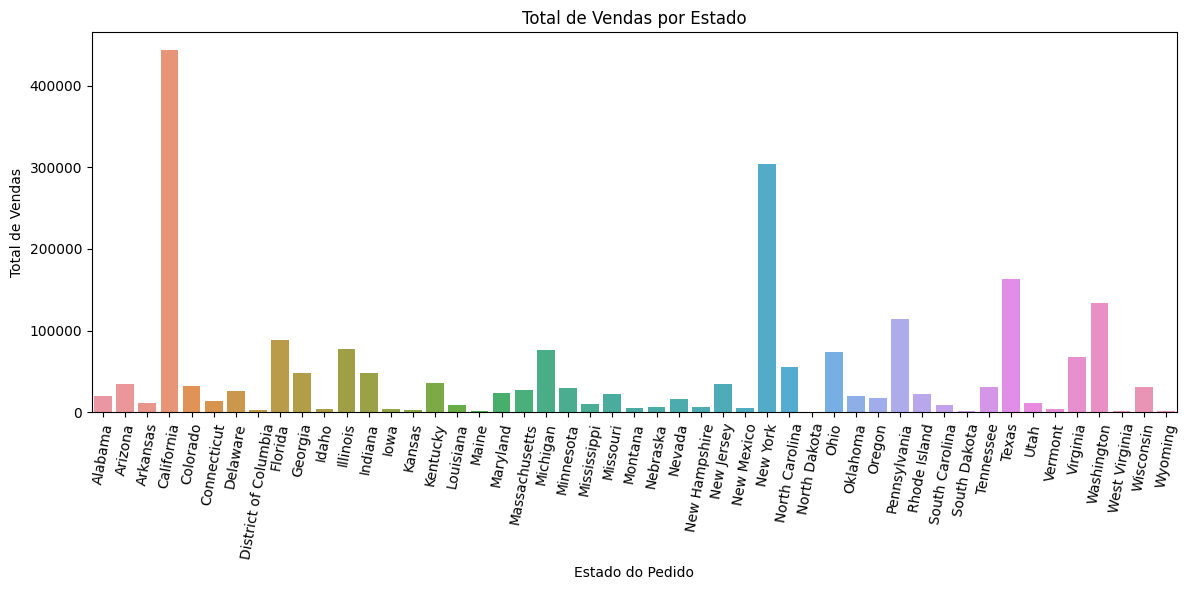

In [15]:
df_p3 = df_dsa.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data = df_p3, 
            y = 'Valor_Venda', 
            x = 'Estado')
plt.title('Total de Vendas por Estado')
plt.xlabel('Estado do Pedido')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

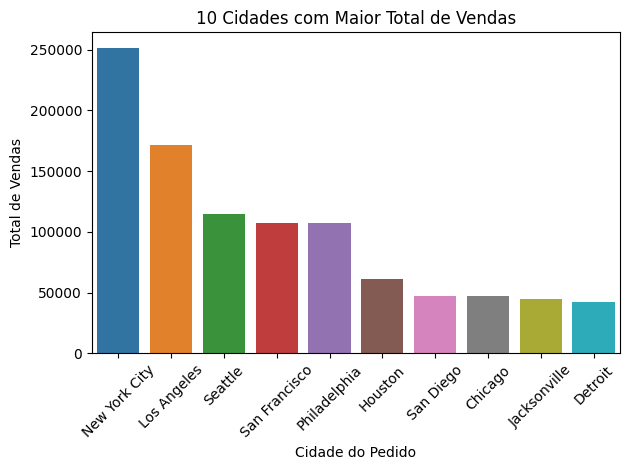

In [184]:
df_p4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum() \
                           .reset_index() \
                           .sort_values(by='Valor_Venda', ascending=False) \
                           .head(10)

sns.barplot(data = df_p4, 
            y = 'Valor_Venda', 
            x = 'Cidade')
plt.title('10 Cidades com Maior Total de Vendas')
plt.xlabel('Cidade do Pedido')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

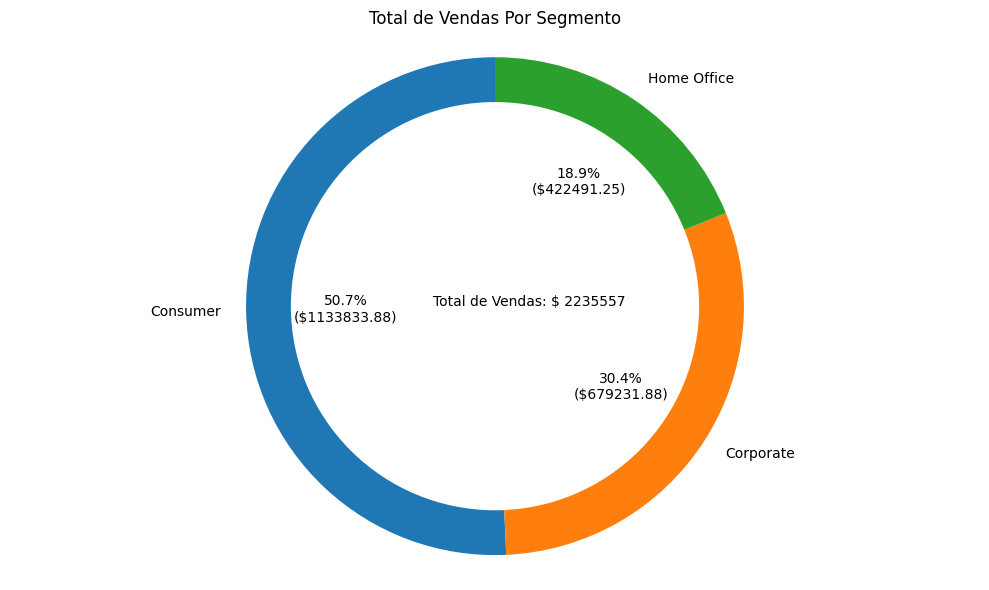

In [177]:
df_p5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum().reset_index()

total_vendas = int(sum(df_p5['Valor_Venda']))
plt.figure(figsize=(10, 6))
plt.pie(df_p5['Valor_Venda'], labels=df_p5['Segmento'], autopct=lambda pct: f'{pct:.1f}%\n(${pct/100 * total_vendas:.2f})', startangle=90)
plt.title('Total de Vendas Por Segmento')
plt.axis('equal')
plt.ylabel('')
plt.tight_layout()

# Adicionar um círculo branco no centro do gráfico de pizza
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Anotar o total de vendas no centro do gráfico de pizza
plt.annotate(text='Total de Vendas: ' + '$ ' + str(int(total_vendas)), xy=(-0.25, 0))

plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [62]:
# Convertendo a coluna 'Data_Pedido' para o tipo de dados datetime, se necessário
df_p6_1 = df_dsa.copy()
df_p6_1['Data_Pedido']= pd.to_datetime(df_p6_1['Data_Pedido'], dayfirst=True)

# Criando uma nova coluna com os últimos 4 dígitos da coluna 'Data_Pedido'
df_p6_1['Ano'] = df_p6_1['Data_Pedido'].dt.year
# Agrupando o DataFrame por segmento e pelos últimos 4 dígitos da 'Data_Pedido' e calculando a soma das vendas para cada grupo
df_p6_2 = df_p6_1.groupby(['Segmento', 'Ano'])['Valor_Venda'].sum()
df_p6_2

Segmento     Ano 
Consumer     2015    256719.9166
             2016    265295.2593
             2017    288459.5572
             2018    323359.6019
Corporate    2015    125819.5957
             2016    114643.1229
             2017    203266.7398
             2018    235502.7284
Home Office  2015     88229.0878
             2016     74134.1332
             2017    103639.6270
             2018    156488.5849
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [179]:
df_p7_1 = df_dsa[df_dsa['Valor_Venda'] >= 1000].copy()
df_p7_2 = df_dsa[df_dsa['Valor_Venda'] < 1000].copy()

df_p7_1.loc[:, 'Desconto'] = 0.15
df_p7_2.loc[:, 'Desconto'] = 0.1
df_p7 = pd.concat([df_p7_1, df_p7_2], ignore_index=True)
df_p7

print("Serão dados {} descontos de 15%".format(len(df_p7_1)))

Serão dados 457 descontos de 15%


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [178]:
df_p8 = df_p7.copy()
df_p8['Valor_Venda_Desconto'] = df_p7['Valor_Venda'] - (df_p7['Valor_Venda'] * df_p7['Desconto'])

df_p8# Filtrando as vendas antes do desconto de 15%

df_dsa_p8_vendas_antes_desconto = df_p8.loc[df_p8['Desconto'] == 0.15, 'Valor_Venda']

# Filtrando as vendas depois do desconto de 15%
df_dsa_p8_vendas_depois_desconto = df_p8.loc[df_p8['Desconto'] == 0.15, 'Valor_Venda_Desconto']

# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_dsa_p8_vendas_antes_desconto.mean()

# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_dsa_p8_vendas_depois_desconto.mean()

print("Média das vendas ANTES do desconto de 15%:", round(media_vendas_antes_desconto, 2))

print("Média das vendas DEPOIS do desconto de 15%:", round(media_vendas_depois_desconto, 2))

Média das vendas ANTES do desconto de 15%: 2116.81
Média das vendas DEPOIS do desconto de 15%: 1799.29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

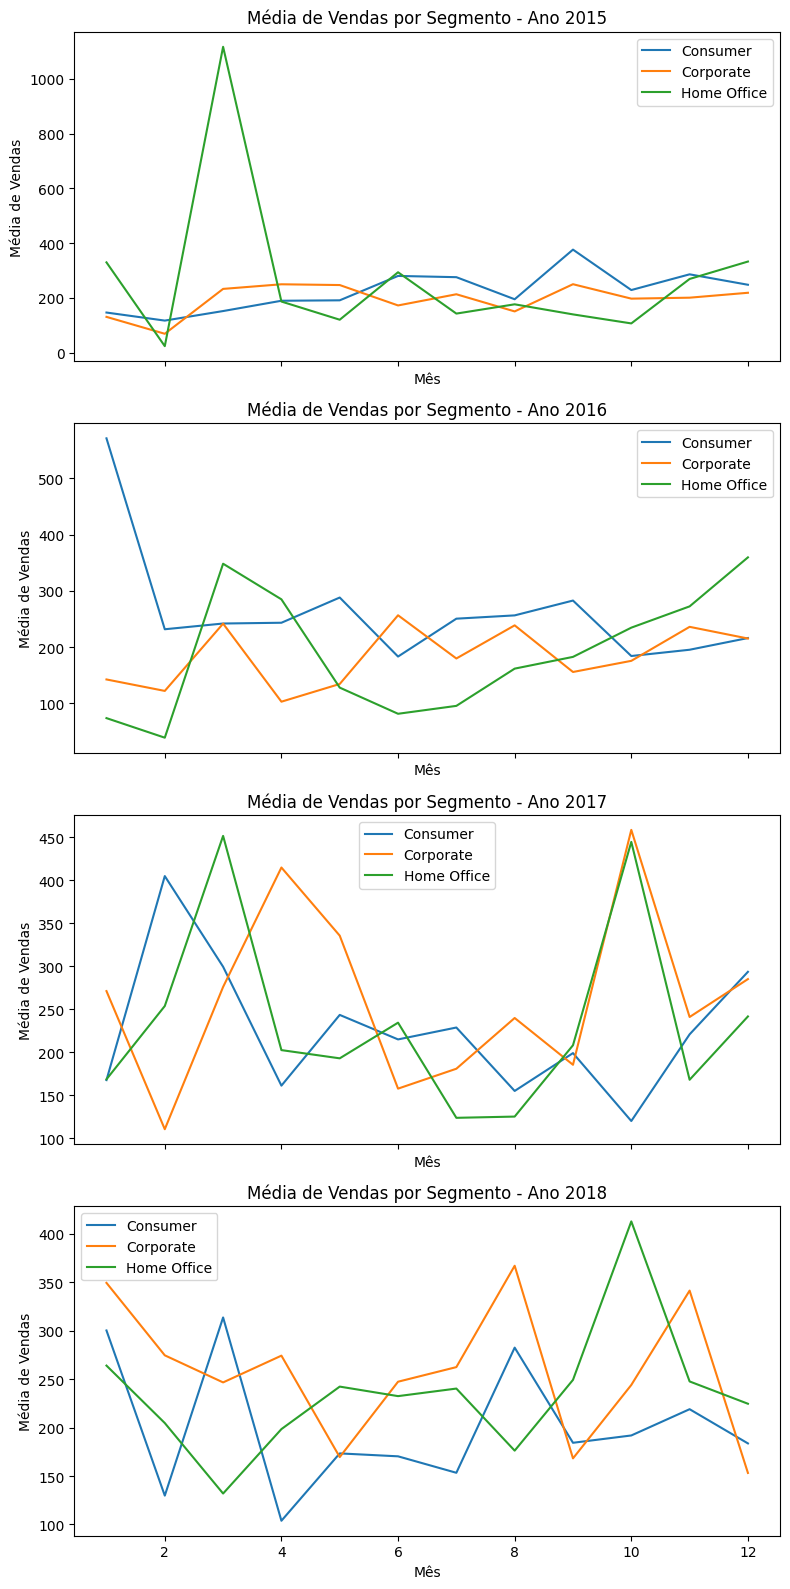

In [82]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst=True)

df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month

df_p9 = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].mean().reset_index()


# Obter uma lista dos anos únicos presentes nos dados
anos_unicos = df_p9['Ano'].unique()

# Criar uma figura e eixos para os subplots
fig, axs = plt.subplots(len(anos_unicos), 1, figsize=(8, 4 * len(anos_unicos)), sharex=True)

# Iterar sobre cada ano e plotar um subplot para cada um deles
for i, ano in enumerate(anos_unicos):
    # Filtrar os dados para o ano atual
    df_ano = df_p9[df_p9['Ano'] == ano]
    
    # Criar um subplot para o ano atual
    ax = axs[i] if len(anos_unicos) > 1 else axs
    
    # Iterar sobre os segmentos únicos e plotar um gráfico de linha para cada um deles
    for segmento in df_ano['Segmento'].unique():
        # Filtrar os dados para o segmento atual
        df_segmento = df_ano[df_ano['Segmento'] == segmento]
        
        # Plotar um gráfico de linha para o segmento atual
        ax.plot(df_segmento['Mes'], df_segmento['Valor_Venda'], label=segmento)
    
    # Definir título e rótulos dos eixos para o subplot atual
    ax.set_title(f'Média de Vendas por Segmento - Ano {ano}')
    ax.set_xlabel('Mês')
    ax.set_ylabel('Média de Vendas')
    
    # Adicionar legenda ao subplot atual
    ax.legend()

# Ajustar o layout para melhor visualização
plt.tight_layout()

# Exibir os subplots
plt.show()


## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

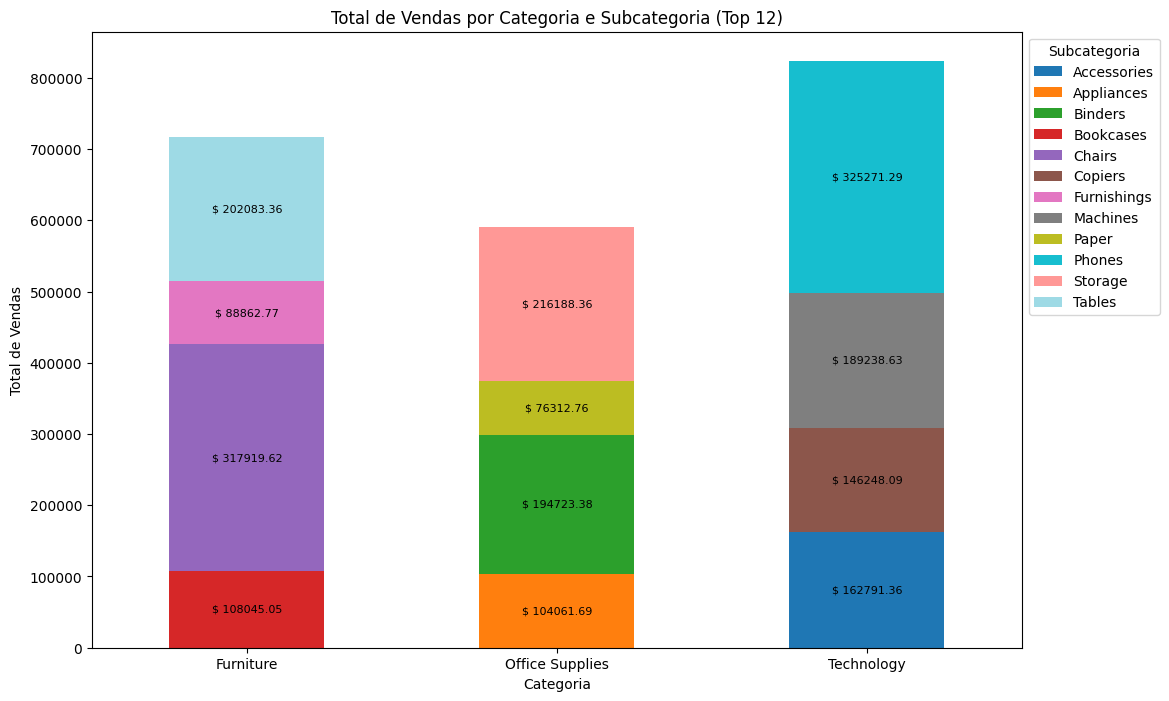

In [175]:
# Criar uma cópia do DataFrame original
df_p10 = df_dsa.copy()

# Calcular o total de vendas por subcategoria
total_vendas_subcategoria = df_p10.groupby('SubCategoria')['Valor_Venda'].sum()

# Selecionar as top 12 subcategorias com base no total de vendas
top_12_subcategorias = total_vendas_subcategoria.nlargest(12)

# Filtrar o DataFrame para incluir apenas as top 12 subcategorias
df_top_12 = df_p10[df_p10['SubCategoria'].isin(top_12_subcategorias.index)]

# Agrupar o DataFrame por categoria e subcategoria e calcular a soma das vendas
df_p10 = df_top_12.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().unstack()

# Definir uma paleta de cores única para as subcategorias
cores_subcategorias = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#9edae5']

# Plotar o gráfico de barras
ax = df_p10.plot(kind='bar', stacked=True, figsize=(12, 8), color=cores_subcategorias)

# Adicionar valores dentro das barras
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    if(height > 0.):
        ax.annotate(f'$ {height:.2f}',  # Formatar o valor como "R${valor:.2f}"
        xy=(p.get_x() + p.get_width() / 2, p.get_y() + height / 2), 
        xytext=(0, 0), 
        textcoords="offset points",
        ha='center', va='center', fontsize=8, color='black')

# Definir título e rótulos dos eixos
plt.title('Total de Vendas por Categoria e Subcategoria (Top 12)')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)

# Adicionar legenda
plt.legend(title='Subcategoria', bbox_to_anchor=(1, 1), loc='upper left')

# Exibir o gráfico
plt.show()

# Fim